In [1]:
import pandas as pd
import numpy as np

### Обучающая/тестирующая выборка

In [182]:
df = pd.read_csv('dataset_processed.csv')

In [183]:
df.head(3)

,company,description,rate,blog_post,tags,date,target,clean_posts,clean_descriptions,year,month,day
0,X5 Group,1 X5 Group — это одна из ведущих компаний р...,-0.6,Привет! Недавно X5 провела митап об опенсорсно...,"['x5retailgroup', 'keycloak', 'базы данных', '...",3 марта в 16:21,СМИ и Массовые коммуникации,привет x провести митапа опенсорсный проект ke...,x group один ведущий компания рынок name descr...,2021.0,марта,3
1,X5 Group,1 X5 Group — это одна из ведущих компаний р...,-0.6,"Привет! Меня зовут Сергей Тетерюков, и я работ...","['x5retailgroup', 'база данных', 'big data', '...",1 марта в 16:27,СМИ и Массовые коммуникации,привет звать сергей тетерюков работать инженер...,x group один ведущий компания рынок name descr...,2021.0,марта,1
2,X5 Group,1 X5 Group — это одна из ведущих компаний р...,-0.6,X5 Tech приглашает студентов и выпускников вуз...,"['x5retailgroup', 'обучение', 'big data', 'бол...",26 февраля в 15:38,СМИ и Массовые коммуникации,x tech приглашать студент выпускник вуз пройти...,x group один ведущий компания рынок name descr...,2021.0,февраля,26


In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_desc = TfidfVectorizer(min_df=10, ngram_range=(1,3))
vectorizer_desc.fit(df.clean_descriptions)
description_vectors = vectorizer_desc.transform(df.clean_descriptions)

vectorizer_blog = TfidfVectorizer(min_df=20, ngram_range=(1,3), max_features=4000)
vectorizer_blog.fit(df.clean_posts)
posts_vectors = vectorizer_blog.transform(df.clean_posts)

vectorizer_tags = TfidfVectorizer(ngram_range=(1,3), max_features=100)
vectorizer_tags.fit(df.tags)
tags_vectors = vectorizer_tags.transform(df.tags)

In [216]:
train = np.hstack((description_vectors.toarray(), posts_vectors.toarray(), tags_vectors.toarray()))
target = df.target

In [218]:
train.shape

(101, 638)

In [219]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, stratify=target)

## Подготовка данных

In [3]:
df = pd.read_csv('dataset_cleaned.csv')

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Векторизация с помощью TF-IDF
vectorizer = TfidfVectorizer(min_df=10, max_features=4000)
vectorizer.fit(df.clean_description)

description_vectors = vectorizer.transform(df.clean_description)

# Векторизация с помощью BagOfWords (BOW)
bow = CountVectorizer(min_df=10, max_features=4000)
bow.fit(df.clean_description)

description_vectors_bow = bow.transform(df.clean_description)

In [170]:
import joblib

In [175]:
joblib.dump(bow, '../bow.joblib')

['../bow.joblib']

In [10]:
df.head(5)

,title,description,rate,company,hubs,keywords,date,target,clean_description
0,"Джеф Безос и его отношение к филантропии, благ...","«Отдавать деньги нужно так же внимательно, как...",77.3,Благотворительный фонд “Подари жизнь”,"['Блог компании Philtech Initiative', 'Управле...","['Безос', 'филантропия', 'филтех', 'благотвори...",3 сентября 2018 в 11:05,Государство и Общество,отдавать внимательно строить успешный компания...
1,Панель управления собой: 10 простых шагов к по...,Когда-то давно я написал на Хабр пост под назв...,-0.2,Благотворительный фонд “Подари жизнь”,"['Управление проектами', 'GTD']","['gtd', 'pomodoro', 'smart-цели', 'колесо бала...",27 декабря 2021 в 05:30,Государство и Общество,написать хабра пост название победить прокраст...
2,bOriss foundation,"Привет, Хабр!Продолжаю избавляться от хлама в ...",0.5,Благотворительный фонд “Подари жизнь”,['Чулан'],['благотворительный фонд'],28 февраля в 17:29,Государство и Общество,привет хабра продолжать избавляться хлам голов...
3,Общественные работы для пиратов,"Мысли вслух о том, как софтверные компании мог...",0.0,Благотворительный фонд “Подари жизнь”,['Копирайт'],"['adobe', 'piracy', 'пиратство', 'нелицензионн...",21 июля 2009 в 11:36,Государство и Общество,мысль вслух софтверный компания борьба пиратст...
4,"AMA с Хабром, v 7.0. Лимон, донаты и новости",Каждую последнюю пятницу месяца я делаю AMA с ...,0.1,Благотворительный фонд “Подари жизнь”,"['Блог компании Хабр', 'Habr']","['Habr', 'AMA', 'прямая линия']",29 марта 2019 в 15:15,Государство и Общество,каждый последний пятница месяц ama хабром пере...


In [40]:
all_years = []
all_days = []
all_month = []

for date in df.date:
    x = date.split()
    all_days.append(x[0])
    all_month.append(x[1])
    if x[2] != 'в':
        all_years.append(x[2])
    else:
        all_years.append(np.nan)
        
df['year'] = all_years
df['month'] = all_month
df['day'] = all_days
df.year = df.year.fillna(df.year.median())

In [86]:
df.to_csv('dataset_processed.csv', index=False)

In [6]:
description_vectors.shape

(1053, 4000)

In [48]:
df.target.shape

(1053,)

In [68]:
# train = np.hstack((description_vectors.toarray(), df[['rate']]))

train = description_vectors
train_bow = description_vectors_bow
target = df.target #.values

In [69]:
# Разделение на обучащую и тестирующую выборки (используем stratify чтобы иметь равную пропорцию классов в train и test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, stratify=target)
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(train_bow, target, test_size=0.3, stratify=target)

### Выбор модели

In [99]:
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from tqdm import tqdm

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**Наивный Байес (базовая модель)**

In [77]:
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, y_train)
y_pred = clf_mnb.predict(X_test)
print('Точность модели: ', accuracy_score(y_pred, y_test))

Точность модели:  0.569620253164557


In [79]:
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_bow, y_train_bow)
y_pred_bow = clf_mnb.predict(X_test_bow)
print('Точность модели: ', accuracy_score(y_pred_bow, y_test_bow))

Точность модели:  0.6012658227848101


BagOfWords (BOW) выдает результат немного лучше (60.1%), чем TF-IDF. 

### Подбор валидационной кривой

In [100]:
def score_pred(y_test, y_pred, log=False):
    _accuracy = accuracy_score(y_pred, y_test) # бесполезна для несбалансированных классов (данной выборки)
    # точность учитывая вклад каждого класса
    _f1 = f1_score(y_pred, y_test, average='weighted') # полезна для вывода как точности, так и полноты
    _precision = precision_score(y_pred, y_test, average='weighted') # полезна для доли правильных ответов в пределах класса
    _recall = recall_score(y_pred, y_test, average='weighted') # полезна для проверки способности обнаружения классов вообще
    
    if log: # checker
        print('accuracy: ', _accuracy)
        print('f1: ', _f1)
        print('precision: ', _precision)
        print('recall:', _recall)
        
    return _accuracy, _f1, _precision, _recall

In [133]:
import matplotlib.pyplot as plt

f1_scores = []
test_size_perc = range(5, 50)

for test_size in tqdm(test_size_perc):
    test_size = test_size / 100
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=test_size, stratify=target, random_state=42)
    clf_mnb.fit(X_train, y_train)
    y_pred = clf_mnb.predict(X_test)
    _, _f1, _, _ = score_pred(y_test, y_pred)
    
    f1_scores.append(_f1)

  0%|                                                                       | 0/45 [00:00<?, ?it/s]/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  2%|█▍                                                             | 1/45 [00:01<01:05,  1.48s/it]/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  4%|██▊                                                            | 2/45 [00:02<01:01,  1.42s/it]/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classifica

 89%|███████████████████████████████████████████████████████       | 40/45 [00:48<00:04,  1.01it/s]/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 91%|████████████████████████████████████████████████████████▍     | 41/45 [00:49<00:03,  1.03it/s]/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 93%|█████████████████████████████████████████████████████████▊    | 42/45 [00:50<00:02,  1.05it/s]/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classifica

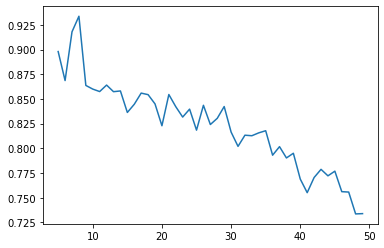

In [134]:
plt.plot(test_size_perc, f1_scores)

In [116]:
max(f1_scores)

0.679010044527286

In [115]:
test_size_perc[f1_scores.index(max(f1_scores))]

7

Лучшая точность базовой модели (67.9%) достигается при размере тестирующей выборки в 7% (0.07).

In [117]:
X_train, X_test, y_train, y_test = train_test_split(train_bow, target, test_size=0.07, stratify=target)

**LogisticRegression**

In [119]:
clf_lnr = LogisticRegression()
clf_lnr.fit(X_train, y_train)
y_pred = clf_lnr.predict(X_test)
print('Точность модели: ', accuracy_score(y_pred, y_test))

Точность модели:  0.7972972972972973


/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**RandomForestClassifier**

In [120]:
clf_rfr = RandomForestClassifier(random_state=42)
clf_rfr.fit(X_train, y_train)
y_pred = clf_rfr.predict(X_test)
print('Точность модели: ', accuracy_score(y_pred, y_test))

Точность модели:  0.8243243243243243


**Метод опорных векторов (SVC)**

In [121]:
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
print('Точность модели: ', accuracy_score(y_pred, y_test))

Точность модели:  0.33783783783783783


Лучший показатель (с базовыми параметрами) у модели RandomForestClassifier (82.4%). Подберем для нее гиперпараметры.

Почему у других такая низкая точность?

### Подбор гиперпараметров

Референс: (Medium)[https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6].

In [163]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report

In [164]:
param_grid = {
    'n_estimators': range(100,1000,100),
    'criterion': ['gini','entropy'],
    'max_depth': range(2,20,1),
    'min_samples_leaf': range(1,10,2),
    'min_samples_split': range(2,10,2)
}

In [167]:
grid_search = GridSearchCV(
    clf_rfr, 
    param_grid, 
    refit=True,
    verbose=2,
#     n_iter=10
)

In [174]:
joblib.dump(grid_search, '../grid_search.joblib')

['../grid_search.joblib']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(train_bow, target, test_size=0.1, stratify=target)

In [169]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   1.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   1.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=700; total time=   1.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=700; total time=   1.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   1.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=8, n_estimators=900; total time=   1.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=600; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=600; total time=   1.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=600; total time=   1.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=4, n_estimators=600; total time=   1.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=2, n_estimators=600; total time=   1.1s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=2, n_estimators=700; total time=   1.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=8, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=8, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=8, n_estimators=800; total time=   1.5s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=8, n_estimators=800; total time=   1.6s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_split=8, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=7, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=4, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_sp

[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=6, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=6, n_estimators=900; total time=   1.7s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=9, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.8s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=700; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total time=   2.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total time=   2.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=800; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   1.8s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=800; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   1.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   2.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   1.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   2.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=900; total time=   2.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   3.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=600; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=700; total time=   1.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   1.4s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=700; total time=   1.5s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=800; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=800; total time=   1.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=800; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=800; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=800; total time=   1.7s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=900; total time=   1.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=400; total time=   0.8s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=900; total time=   1.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=900; total time=   2.3s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=900; total time=   2.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=900; total time=   2.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=900; total time=   1.9s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_sp

[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=600; total time=   1.2s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_sp

[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   1.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   1.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   1.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   1.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   1.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   1.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=800; total time=   2.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_sp

[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=400; total time=   1.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   1.9s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   2.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   2.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   2.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=800; total time=   2.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   2.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   2.7s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=900; total time=   2.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_sp

[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=400; total time=   0.9s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.3s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_sp

KeyboardInterrupt: 

In [180]:
joblib.dump(clf_rfr, '../clf.joblib')

['../clf.joblib']

In [ ]:
grid_search.best_params_

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
score_pred(y_test, y_pred)

In [160]:
print(classification_report(y_test, y_pred))

                                                precision    recall  f1-score   support

                        Государство и Общество       0.57      0.40      0.47        10
За развитие среднего и малого бизнеса в Рунете       1.00      0.60      0.75         5
                           Здоровье и медицина       0.72      1.00      0.84        18
                Игровая индустрия и киберспорт       0.22      0.67      0.33         3
                          Креативные индустрии       0.84      0.94      0.89        17
                     Культурные проекты в Сети       0.00      0.00      0.00         2
                 Наука, технологии и инновации       1.00      0.78      0.88         9
                           Образование и Кадры       1.00      0.50      0.67         6
                         Открытые коммуникации       1.00      1.00      1.00        12
                  Развитие внутреннего туризма       0.00      0.00      0.00         1
                   СМИ и Массов

/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Компании с нулевой точностью в виду их малого количества - 'Культурные проекты в Сети', 'СМИ и Массовые коммуникации'

In [150]:
print(0.8301886792452831-0.8243243243243243)

0.005864354920958714


Точность accuracy повысилась на 0.58% после нахождения лучших параметров для RandomizedSearchCV.

In [152]:
score_pred(y_test, clf_rfr.predict(X_test))

/Users/Sardaana/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8490566037735849,
 0.8675312495074161,
 0.9103588605253422,
 0.8490566037735849)

Вывод: Модель RandomForestClassifier с гиперпараметрами {'kernel': 'rbf', 'gamma': 0.1, 'C': 10} лучше всего справилась с задачей.

* accuracy: 0.88
* f1_score: 0.88
* precision_score: 0.89
* recall_score: 0.88